<a href="https://colab.research.google.com/github/rohailkhan/Acomputer_vision/blob/main/19_Black_and_White_Photos_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Summary**



In [ ]:
# LIBARIES

from keras.datasets import fashion_mnist
# libraries for pr-processing
import numpy as np
import tensorflow as tf
from numpy import asarray

# for plotting model  and transfer learning
from keras import utils
from keras.layers import Input
#Libraries for CNN
from keras.models import Sequential , Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
# Optimizers
from keras import optimizers

In [ ]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


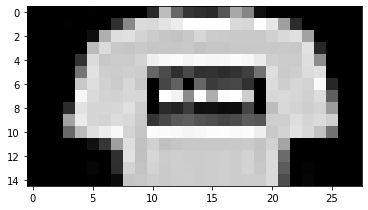

In [ ]:
import matplotlib.pyplot as plt
trainX[1].shape
plt.imshow(trainX[1][0:15][0:28],cmap='gray')
plt.show()

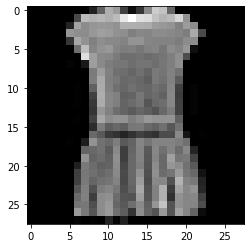

In [ ]:

plt.imshow(trainX[3][0:28][0:28],cmap='gray')
plt.show()

In [ ]:
(trainX.shape, trainY.shape), (testX.shape, testY.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [ ]:
trainX ,testX =trainX.reshape(60000,28,28,1) , testX.reshape(10000,28,28,1)

In [ ]:
# change TrainY and TestY to categorical
# one hot encode target values
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [ ]:
# convert to arrays and float and divide by 255..so between 0 and 1
trainX ,testX =trainX.astype('float')/255.0 , testX.astype('float')/255.0

In [ ]:
model=Sequential()

model.add(Conv2D(64,kernel_size=(3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=1))

model.add(Flatten())
model.add(Dense(units=100, activation='relu',  kernel_initializer='glorot_uniform'))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Note : Since batch-size=40 and 60k/100 =600 ,therefore in each epoch there will be total 1500 batches




In [ ]:
history=model.fit(x=trainX, y=trainY, batch_size=80, epochs=10, verbose='auto', callbacks=None, validation_split=0.0)

Epoch 1/10
750/750 [==============================] - 141s 188ms/step - loss: 0.0704 - accuracy: 0.9742
Epoch 2/10
750/750 [==============================] - 99s 132ms/step - loss: 0.0579 - accuracy: 0.9790
Epoch 3/10
750/750 [==============================] - 99s 132ms/step - loss: 0.0450 - accuracy: 0.9841
Epoch 4/10
750/750 [==============================] - 98s 131ms/step - loss: 0.0440 - accuracy: 0.9839
Epoch 5/10
750/750 [==============================] - 99s 132ms/step - loss: 0.0367 - accuracy: 0.9872
Epoch 6/10
750/750 [==============================] - 99s 132ms/step - loss: 0.0332 - accuracy: 0.9887
Epoch 7/10
750/750 [==============================] - 99s 132ms/step - loss: 0.0307 - accuracy: 0.9892
Epoch 8/10
750/750 [==============================] - 98s 131ms/step - loss: 0.0248 - accuracy: 0.9913
Epoch 9/10
750/750 [==============================] - 98s 130ms/step - loss: 0.0201 - accuracy: 0.9930
Epoch 10/10
750/750 [==============================] - 98s 131ms/step - 

## Saving Model
### 1- Saving Model

In [ ]:
# saving model

path='/content/drive/MyDrive/20210309_Files/'
model_path=path +'/digits_model1.h5'
# saving model
model.save(model_path,overwrite=True)


### 2- Saving History of training

In [ ]:
import json

In [ ]:
# saving model history 


# # Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

# # Save it under the form of a json file
history_path=path +'/history_digits_model1.json'
json.dump(str(history_dict), open(history_path, 'w'))

# Using Model Evalutation (only) on the Test Data
This time ,no training is required. Simply load the previously saved model (that was trainined using the training data)

In [ ]:
losses , accuracy =model.evaluate(testX, testY)
print('Final modal accuracy={} loss={}'.format(accuracy*100, losses))

313/313 [==============================] - 5s 16ms/step - loss: 0.5392 - accuracy: 0.9127
Final modal accuracy=91.26999974250793 loss=0.5392260551452637


# Loading History of Accuracy and Losses of the Mode

In [ ]:
path='/content/drive/MyDrive/20210309_Files/'
history_path=path +'/history_digits_model1.json'
history= json.load(open(history_path, 'r'))

In [ ]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history_1=ast.literal_eval(history)

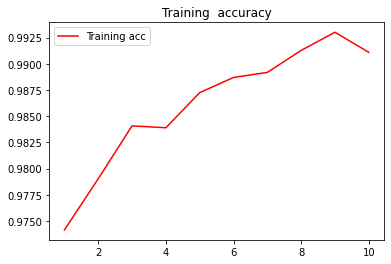

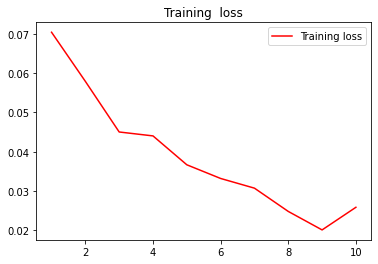

In [ ]:
### .
import numpy as np
import matplotlib.pyplot as plt

acc = history_1['accuracy']
#acc=np.array(acc)

#val_acc=np.array(val_acc)
loss = history_1['loss']

epochs = range(1, len(acc) + 1)
acc=np.array(acc)

plt.plot(epochs, np.array(acc), 'r', label='Training acc')

plt.title('Training  accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training  loss')
plt.legend()
plt.show()

# Predictions


```
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
```



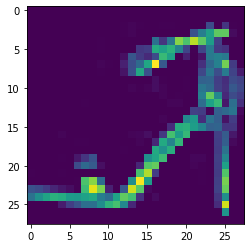

In [ ]:
plt.imshow(trainX[8])

In [ ]:
iamge_path='/content/drive/MyDrive/20210309_Datasets/download.png'
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
model=load_model(filepath='/content/drive/MyDrive/20210309_Files/digits_model1.h5')

In [ ]:
image=load_img(path=iamge_path,target_size=(28,28) , color_mode='grayscale')


In [ ]:
image=np.array(image)
image.shape

(28, 28)

In [ ]:
image=image.reshape(1,28,28,1)

In [ ]:
image=image.astype('float32')/255.0
prediction=model.predict(image)
prediction

array([[0.02698781, 0.00080144, 0.00342089, 0.0016097 , 0.00252902,
        0.65096533, 0.00392458, 0.00969058, 0.27617192, 0.02389874]],
      dtype=float32)

In [ ]:
#using VGG

## Reamining Tasks


1.   Make functions for loading and preprocessing
2.   Make function for model and training

2.   Use kfold splits for training

